### This project is comprised of hydrochemical dataset sourced from Kaggle.com

##### This project is an update of a combined work of Ihenetu Victoria, Athanasius Chinonso and Somtochukwu Azi to develop an accurate model to predict the potability of water based on several physico-chemical data such as pH, hardness, Solids, etc

* The dataset is shows a collection of physico-chemical parametric quantities such as pH,Total dissolved solids, hardness, etc.

* Building on the previously collaborated work with the authors, we want to be sure that the features that were selected for training and modeling actually affects water potability such as hypothesis testing, cross-validation, etc.

* Machine learning techniques was applied on the dataset to test, train, model prediction based on the important feature selections. 

* Features were selected created and selected based on the geological understanding of the effects of  knowledge

* Any new findings correlating (or not correlating) with other author's contribution on the dataset is independent of the other author's submission.


In [1]:
# To import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso


In [2]:
#import dataset

WaterData = pd.read_csv("C:/Users/user/Downloads/water_potability.csv")

In [3]:
WaterData.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# Summary statistics of the dataset
WaterData.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Conduct initial exploration on the data analysis without feature scaling and handling missing data

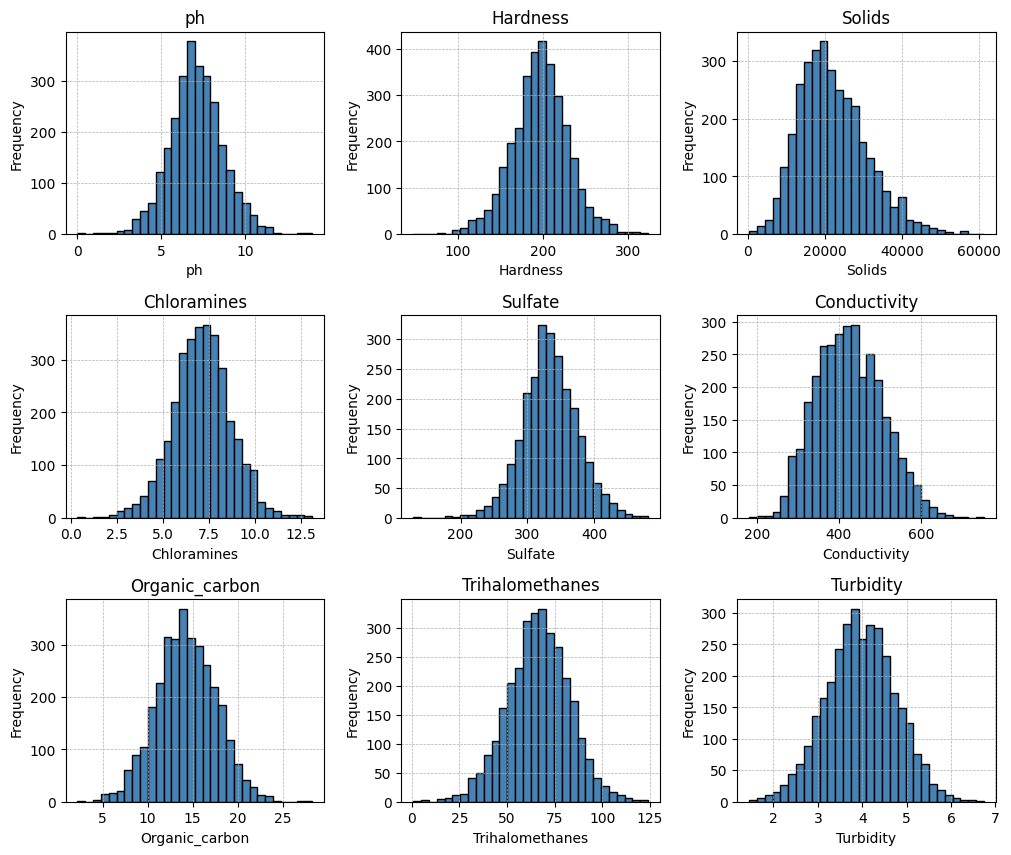

In [5]:
import matplotlib.pyplot as plt

# Automatically get the columns from your dataset (excluding 'Potability' if you don't want it)
columns = WaterData.columns.drop('Potability')  # Drop 'Potability' if it's not required in the histograms

# Create histograms with improved aesthetics
fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 3x3 grid for the plots
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Add space between the plots

# Loop through the columns and create a histogram for each one
for i, ax in enumerate(axes.flat):
    if i < len(columns):  # Ensure we don't go out of bounds
        ax.hist(WaterData[columns[i]].dropna(), bins=30, color='steelblue', edgecolor='black')
        ax.set_title(columns[i], fontsize=12)  # Set the title
        ax.set_xlabel(columns[i])  # X-axis label
        ax.set_ylabel('Frequency')  # Y-axis label
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Light grid
    else:
        ax.axis('off')  # Hide any empty subplots

# Display the plot
plt.show()


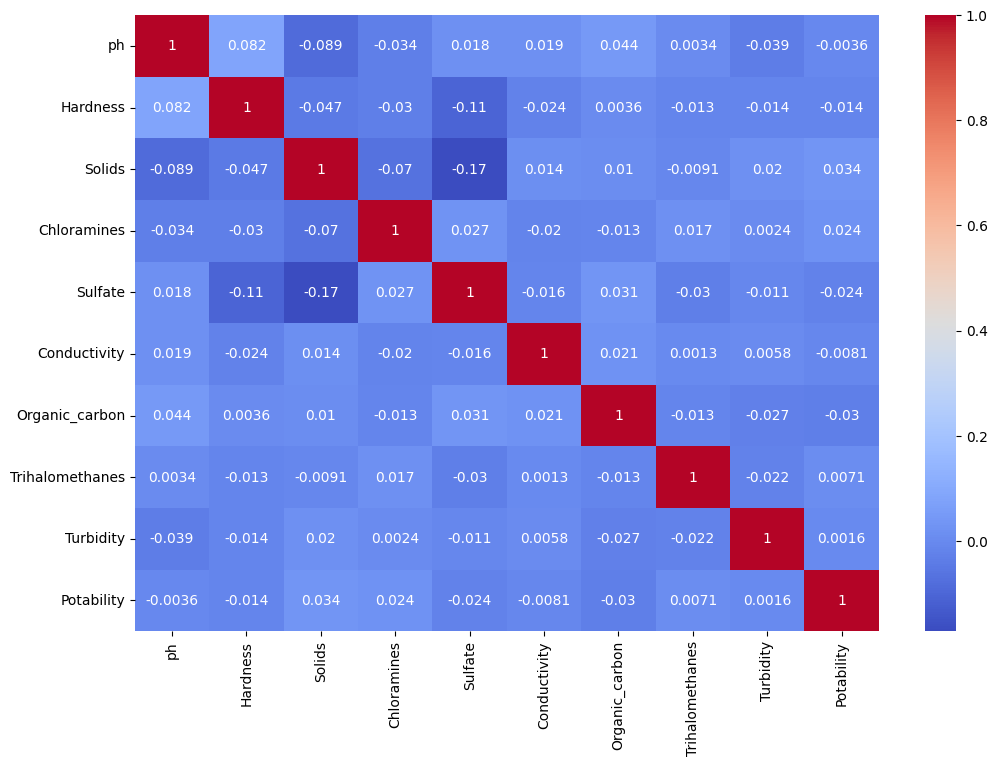

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(WaterData.corr(), annot=True, cmap='coolwarm')
plt.show()

### Handle Missing Data

* Check for missing values: Often, real-world datasets contain missing values that need to be addressed.

##### Strategies for missing data:
* Imputation (using mean, median, mode, or a predictive model)
* Removal of rows/columns (if missing values are not significant)
* Interpolation (for time series data)

In [7]:
# Check for missing values
missing_data = WaterData.isnull().sum()

# If missing data exists
print(missing_data[missing_data > 0])


ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64


### Data Cleaning
#### Remove or Impute Outliers: Outliers can distort your model, especially for models like linear regression. Decide whether to remove or cap them.

* Handle Duplicate Entries: Remove any duplicate rows or observations in your data.
* Ensure Consistent Data Types: Features should be in the appropriate data type, e.g., numerical features should be floats or integers, and categorical features should be converted to category type or one-hot encoded.

In [8]:
#Handling duplicates to ensure data integrity

WaterData.drop_duplicates(inplace=True)

In [9]:
# Check for missing values
missing_data = WaterData.isnull().sum()

# If missing data exists
print(missing_data[missing_data > 0])

ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64


In [10]:
# Correcting missing value by filling missing values with the mean
WaterData.fillna(WaterData.mean(), inplace=True)

In [11]:
# Check for missing values
missing_data = WaterData.isnull().sum()

# If missing data exists
print(missing_data[missing_data > 0])

Series([], dtype: int64)


#### Empty Series array [] shows that there are no missing values to be corrected

##### An imbalanced dataset can cause models to become biased toward the majority class. 

* Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or using class-weighted models can help address this issue.

0    1998
1    1278
Name: Potability, dtype: int64


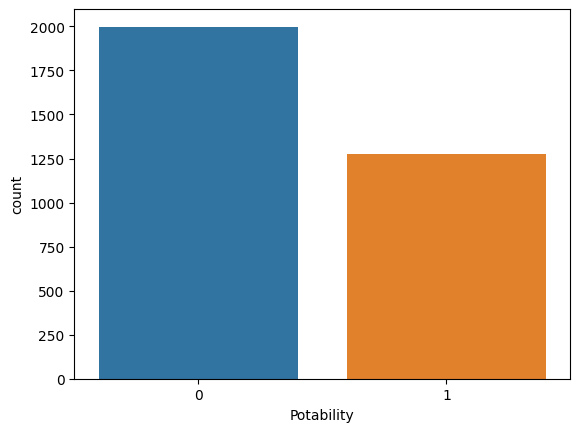

In [12]:
# Check the balance of the target
print(WaterData['Potability'].value_counts())

# Plot target distribution
sns.countplot(x='Potability', data=WaterData)
plt.show()

#### We are further going to select our feature parameters based on doman knowledge in hydrogeochemistry, underground water-mineral interaction.

* Technics may include interactive and ratio features. 

* Initially in the first code version of the project, the authors did not consider the importance of ensuring the features selected is relevant to predicting water potability, such that p < 0.005. 

* This is why the Code2 Version of water potability machine learning analysis have integrated statistical application such as cross-validation, t-test (p<0.005), etc

In [13]:
WaterData.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Conduct feature engineering to select suitable features for model training and testing

* For the case of this study, we applied first, domain knowledge such as ratio and interactive features

* Knowing from the correlation map between hydrochemical features and water potability, alone (or independently per say) shows weak correlations. 

* Logically, we move ahead to explore how an interaction between the hydrochemical paramtric features would reveal about it's effects on water potability

#### Steps for Feature Engineering:
* #### Creating Product Features: Generate features that are the product of two or more columns.
* #### Creating Ratio Features: Create ratio features by dividing one column by another (handling divisions by zero).
* #### Creating Polynomial Features: Generate polynomial combinations of the features (e.g., squared, cubic terms).
* #### Log Transformations: Apply logarithmic transformations to specific columns to reduce skewness in distributions.
* #### Binning: Divide continuous features into bins (groups) to create categorical features.

In [14]:

# Convert the dictionary to a DataFrame# Only include non-target columns for interaction terms
columns = WaterData.columns.difference(['Potability'])

# Example for interaction term creation
interaction_features = {}
for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            interaction_features[f'{col1}_x_{col2}'] = WaterData[col1] * WaterData[col2]

# Convert to DataFrame and add to the main DataFrame
interaction_WaterData = pd.DataFrame(interaction_features)
WaterData = pd.concat([WaterData, interaction_WaterData], axis=1)

new_features_WaterData = pd.DataFrame(interaction_features)

# Concatenate the new features with the original data
WaterData = pd.concat([WaterData, new_features_WaterData], axis=1)

In [15]:
# Create a dictionary for the ratio features
ratio_features = {}

for i, col1 in enumerate(columns):
    for col2 in columns[i+1:]:
        ratio_features[f'{col1}_div_{col2}'] = np.where(WaterData[col2] != 0, WaterData[col1] / WaterData[col2], 0)
        ratio_features[f'{col2}_div_{col1}'] = np.where(WaterData[col1] != 0, WaterData[col2] / WaterData[col1], 0)

# Convert the ratio features to a DataFrame
ratio_features_df = pd.DataFrame(ratio_features)

# Concatenate the ratio features to the original DataFrame
WaterData = pd.concat([WaterData, ratio_features_df], axis=1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Select the original DataFrame columns
poly_features = poly.fit_transform(WaterData[columns])

# Convert polynomial features back into DataFrame
poly_columns = poly.get_feature_names_out(input_features=WaterData[columns].columns)
poly_WaterData = pd.DataFrame(poly_features, columns=poly_columns)

# Concatenate polynomial features to the original DataFrame
WaterData = pd.concat([WaterData.reset_index(drop=True), poly_WaterData.reset_index(drop=True)], axis=1)


In [17]:
# Create a dictionary for log transformations
log_features_WaterData = pd.DataFrame()

for col in columns:
    log_features_WaterData[f'log_{col}'] = np.log1p(WaterData[col].iloc[:, 0])  # log1p to handle zeros


# Concatenate the log features to the original DataFrame
WaterData = pd.concat([WaterData, log_features_WaterData], axis=1)


In [18]:
# Create a dictionary for binned features
binned_features = {}

for col in columns:
    binned_features[f'binned_{col}'] = pd.cut(WaterData[col].iloc[:, 0], bins=5, labels=False)  # Example: 5 bins

# Convert binned features to a DataFrame
binned_features_WaterData = pd.DataFrame(binned_features)

# Concatenate the binned features to the original DataFrame
WaterData = pd.concat([WaterData, binned_features_WaterData], axis=1)


In [19]:
# Display the first few rows to see the new features
print(WaterData.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  ...    log_ph  \
0       10.379783        86.990970   2.963135           0  ...  2.089490   
1       15.180013        56.329076   4.500656           0  ...  1.550978   
2       16.868637        66.420093   3.055934           0  ...  2.208178   
3       18.436524       100.341674   4.628771           0  ...  2.231816   
4       11.558279        31.997993   4.075075           0  ...  2.311765   

   binned_Chloramines  binned_Conductivity  binned_Hardness  \

In [20]:
WaterData.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,...,log_ph,binned_Chloramines,binned_Conductivity,binned_Hardness,binned_Organic_carbon,binned_Solids,binned_Sulfate,binned_Trihalomethanes,binned_Turbidity,binned_ph
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,...,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110,...,2.071366,2.146520,1.640720,2.194750,1.815629,1.291819,2.303724,2.154457,1.878816,2.021673
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849,...,0.198059,0.673074,0.764504,0.666711,0.700412,0.769856,0.599948,0.701981,0.787089,0.574645
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000,...,1.984811,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000,...,2.089490,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000,...,2.182680,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000,...,2.708050,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


##### Now that we have created new features; let us go ahead to check how appropriate these features applies to our predicator or "Target" say: Potability

In [21]:
#Viewing interaction features
interaction_features = WaterData.filter(like='_x_')
print(interaction_features)

      Chloramines_x_Conductivity  Chloramines_x_Hardness  \
0                    4119.572737             1495.743736   
1                    3933.940139              858.752901   
2                    3882.942508             2079.989442   
3                    2927.685595             1727.706436   
4                    2608.236221             1185.599136   
...                          ...                     ...   
3271                 3772.691960             1388.047067   
3272                 3163.678123             1560.302503   
3273                 3175.629923             1291.896444   
3274                 2539.515904             1453.577702   
3275                 2458.995497             1465.082833   

      Chloramines_x_Organic_carbon  Chloramines_x_Solids  \
0                        75.774616         151781.033682   
1                       100.723120         123615.014718   
2                       156.471513         184678.591692   
3                       148.586079     

In [22]:
# Ratio features
ratio_features = WaterData.filter(like='_div_')
print(ratio_features)

      Chloramines_div_Conductivity  Conductivity_div_Chloramines  \
0                         0.012937                     77.300312   
1                         0.011191                     89.353939   
2                         0.022159                     45.128446   
3                         0.022186                     45.074021   
4                         0.016432                     60.857669   
...                            ...                           ...   
3271                      0.013614                     73.454820   
3272                      0.020541                     48.682788   
3273                      0.017013                     58.779738   
3274                      0.015646                     63.915647   
3275                      0.022932                     43.607194   

      Chloramines_div_Hardness  Hardness_div_Chloramines  \
0                     0.035630                 28.066371   
1                     0.051268                 19.505369   
2  

In [23]:
# Polynomial features (these could be named using patterns like '_^2_' or '_x_')

polynomial_features = WaterData.filter(regex=r'^(ph|Hardness|Solids|Chloramines|Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity)_')
print(polynomial_features)

      Chloramines_x_Conductivity  Chloramines_x_Hardness  \
0                    4119.572737             1495.743736   
1                    3933.940139              858.752901   
2                    3882.942508             2079.989442   
3                    2927.685595             1727.706436   
4                    2608.236221             1185.599136   
...                          ...                     ...   
3271                 3772.691960             1388.047067   
3272                 3163.678123             1560.302503   
3273                 3175.629923             1291.896444   
3274                 2539.515904             1453.577702   
3275                 2458.995497             1465.082833   

      Chloramines_x_Organic_carbon  Chloramines_x_Solids  \
0                        75.774616         151781.033682   
1                       100.723120         123615.014718   
2                       156.471513         184678.591692   
3                       148.586079     

In [24]:
# Log-transformed features
log_features = WaterData.filter(like='log_')

print(log_features)

      log_Chloramines  log_Conductivity  log_Hardness  log_Organic_carbon  \
0            2.116281          6.337372      5.327344            2.431838   
1            2.032775          6.386686      4.870782            2.783777   
2            2.329800          6.039317      5.417150            2.883047   
3            2.203795          5.897886      5.372373            2.967154   
4            2.021097          5.989990      5.204564            2.530380   
...               ...               ...           ...                 ...   
3271         2.100057          6.268005      5.271366            2.700987   
3272         2.204019          5.974953      5.270706            3.039903   
3273         2.122289          6.070841      5.174808            2.488157   
3274         1.988334          6.001126      5.445028            2.498887   
3275         2.141160          5.794414      5.278636            2.841436   

      log_Solids  log_Sulfate  log_Trihalomethanes  log_Turbidity    log_ph

In [25]:
# Binned features
binned_features = WaterData.filter(like='binned_')
print(binned_features)

      binned_Chloramines  binned_Conductivity  binned_Hardness  \
0                      2                    3                2   
1                      2                    3                1   
2                      3                    2                3   
3                      3                    1                3   
4                      2                    1                2   
...                  ...                  ...              ...   
3271                   2                    3                2   
3272                   3                    1                2   
3273                   2                    2                2   
3274                   2                    1                3   
3275                   2                    1                2   

      binned_Organic_carbon  binned_Solids  binned_Sulfate  \
0                         1              1               3   
1                         2              1               2   
2                    

#### Since we have created new features

* We will go ahead to put these features to scale 

* This is to ensure there are no discrepancies in the data and measurements

### Feature Scaling

* Before we build our models, we will first scale the features we have scaled to the size numerical 'size'

* This is done before we conduct feature assessment test

In [26]:
#Scale the features for better feature importance testing
X = WaterData.drop(columns='Potability')
y = WaterData['Potability']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled features back to a DataFrame for easy handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [27]:
# Robust Scaling: This method is robust to outliers by using the median and the interquartile range.

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_features = scaler.fit_transform(WaterData[columns])

In [28]:
#Min-Max Scaling: Scale the features to a fixed range, usually [0, 1]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(WaterData[columns])


### Step 2: Testing Feature Importance

* After scaling the features, you can evaluate their importance using various methods. 

* We are using random forest classifier and Lasso regression to check for and extract important features that has been created

##### Create a feature importance classification with Lasso Regression

Top features from Lasso Regression:
                             Feature  Importance
11               Solids_div_Sulfate    0.022464
12               Sulfate_div_Solids    0.018200
10                  ph_div_Hardness    0.012663
8            Solids_div_Chloramines    0.011913
9   Trihalomethanes_div_Chloramines    0.010214
20                   binned_Sulfate    0.009686
0                  Chloramines_x_ph    0.009173
2                  ph_x_Chloramines    0.008948
15                   Chloramines ph    0.003408
4                  Chloramines_x_ph    0.003094


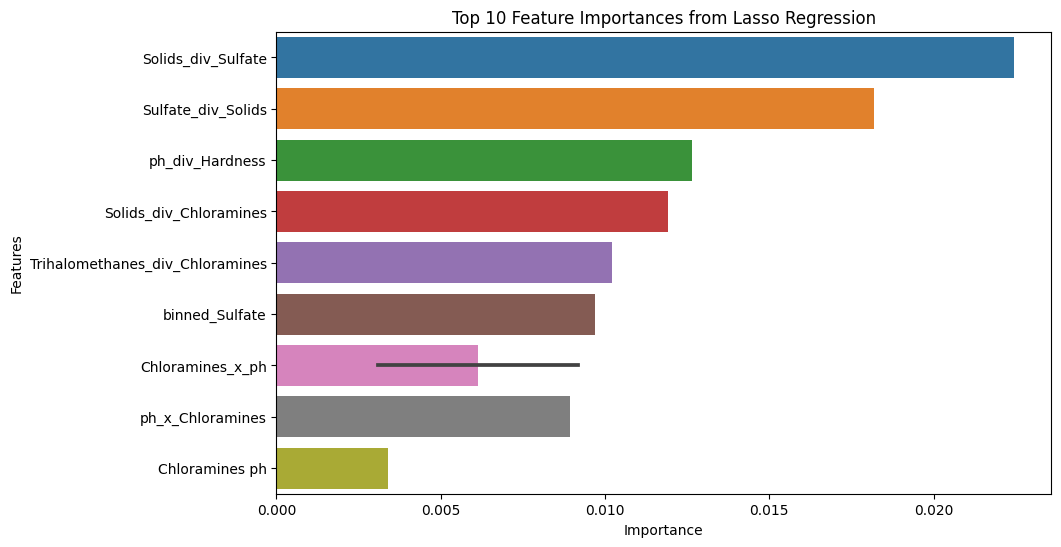

In [29]:
# Prepare the data
X = WaterData.drop(columns=['Potability'])  # Drop the target variable
y = WaterData['Potability']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data only
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Convert scaled data back to DataFrame to ensure column names are preserved
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Fit the Lasso model
lasso = Lasso(alpha=0.01, max_iter=10000, tol=0.01)  # Adjust alpha, max_iter, and tol as needed
lasso.fit(X_train_scaled_df, y_train)

# Get the coefficients (importance scores)
lasso_importance = pd.Series(lasso.coef_, index=X_train.columns)
lasso_importance = lasso_importance[lasso_importance != 0]  # Select non-zero coefficients

# Create a DataFrame for feature importances
lasso_importance_df = pd.DataFrame({
    'Feature': lasso_importance.index,
    'Importance': lasso_importance.values
}).sort_values(by='Importance', ascending=False)

# Display top features from Lasso Regression
print("Top features from Lasso Regression:\n", lasso_importance_df.head(10))

# Plotting Feature Importances from Lasso Regression (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lasso_importance_df.head(10))
plt.title('Top 10 Feature Importances from Lasso Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


##### Feature Importance Analysis with Random Forest

* Random Forest gives a feature importance score based on how much each feature improves the split in the trees.

Top features from Random Forest:
                 Feature  Importance
269           Sulfate^2    0.008903
51   Sulfate_x_Hardness    0.008834
254    Hardness Sulfate    0.007755
123  Sulfate_x_Hardness    0.007234
284         log_Sulfate    0.007139
217      Sulfate_div_ph    0.006894
230             Sulfate    0.006841
29   Hardness_x_Sulfate    0.006752
4               Sulfate    0.006677
101  Hardness_x_Sulfate    0.006630


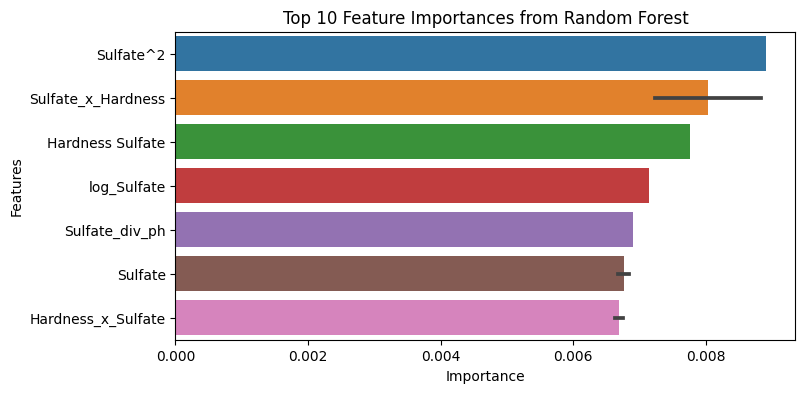

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data
X = WaterData.drop(columns=['Potability'])  # Drop the target variable
y = WaterData['Potability']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data only
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importance scores
importance_scores = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Set a threshold (e.g., 0.05)
importance_threshold = 0.05
important_features = importance_scores[importance_scores > importance_threshold].index

# Filter your dataset to keep only important features
X_train_filtered = X_train_scaled[:, importance_scores > importance_threshold]

# Create a DataFrame for feature importances
rf_importance_df = pd.DataFrame({
    'Feature': importance_scores.index,
    'Importance': importance_scores.values
}).sort_values(by='Importance', ascending=False)

# Display top features from Random Forest
print("Top features from Random Forest:\n", rf_importance_df.head(10))

# Plotting Feature Importances from Random Forest (Top 10)
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(10))
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


##### Applying mutual info for model importance classification

For classification, mutual information can give insights into how much each feature reduces uncertainty for the target variable.

Top features from Mutual Information:
                         Feature  Importance
251                  Hardness^2    0.021837
1                      Hardness    0.021770
227                    Hardness    0.021770
281                log_Hardness    0.021411
44      Solids_x_Organic_carbon    0.021223
108     Organic_carbon_x_Solids    0.021223
116     Solids_x_Organic_carbon    0.021223
36      Organic_carbon_x_Solids    0.021223
259       Organic_carbon Solids    0.021223
30   Hardness_x_Trihalomethanes    0.019399


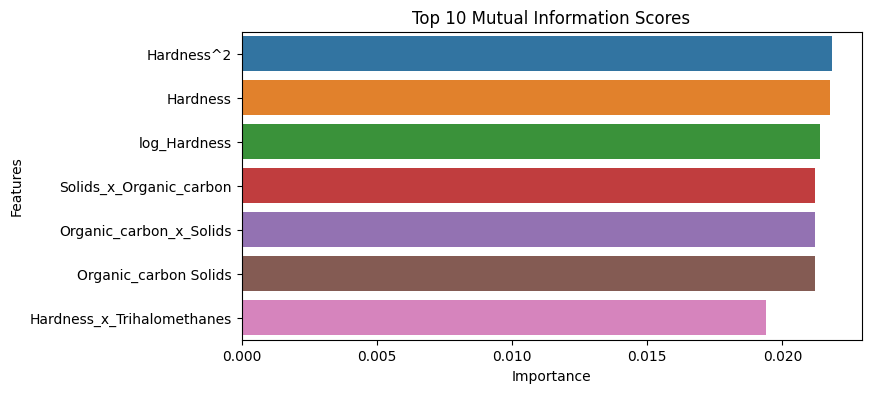

In [31]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare the data
X = WaterData.drop(columns=['Potability'])  # Drop the target variable
y = WaterData['Potability']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data only
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Calculate mutual information for classification
mi_scores = mutual_info_classif(X_train_scaled, y_train)

# Convert into a Series for better readability
mi_importance = pd.Series(mi_scores, index=X_train.columns)

# Set a threshold (e.g., 0.05)
importance_threshold = 0.05
important_features = mi_importance[mi_importance > importance_threshold].index

# Filter your dataset to keep only important features
X_train_filtered = X_train_scaled[:, mi_importance > importance_threshold]

# Create a DataFrame for feature importances
mi_importance_df = pd.DataFrame({
    'Feature': mi_importance.index,
    'Importance': mi_importance.values
}).sort_values(by='Importance', ascending=False)

# Display top features from Mutual Information
print("Top features from Mutual Information:\n", mi_importance_df.head(10))

# Plotting Feature Importances from Mutual Information (Top 10)
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=mi_importance_df.head(10))
plt.title('Top 10 Mutual Information Scores')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


##### Performing ANOVA Test for statistics 

* ANOVA F-test for linear models to identify which features explain variance in the target variable. This is mostly for linear relationships.

Length of X_train: 2620
Length of y_train: 2620
Length of X_test: 656
Length of y_test: 656
Top features from ANOVA F-test:
                           F-Score   p-Value
Solids_div_Sulfate      11.838665  0.000589
Solids_div_Chloramines   8.123914  0.004403
Solids_div_Hardness      7.836422  0.005158
ph_x_Solids              7.633071  0.005771
Solids_x_ph              7.633071  0.005771
Solids ph                7.633071  0.005771
Solids_x_ph              7.633071  0.005771
ph_x_Solids              7.633071  0.005771
binned_Solids            5.833166  0.015795
Solids^2                 5.305515  0.021336


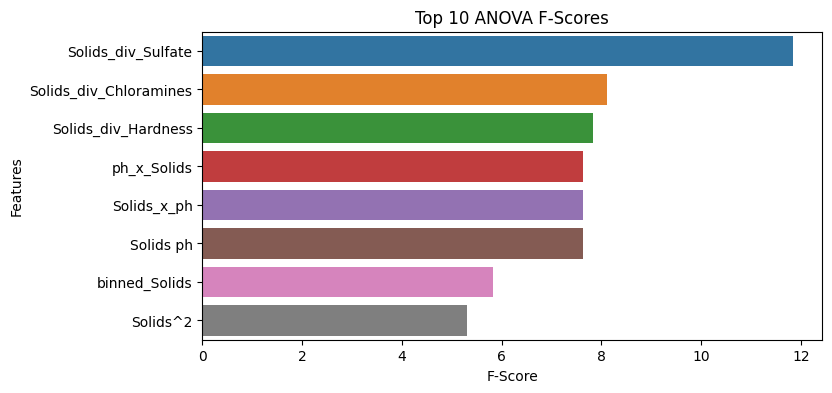

In [32]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Prepare the data
X = WaterData.drop(columns=['Potability'])  # Drop the target variable
y = WaterData['Potability']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check lengths
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

assert len(X_train) == len(y_train), "Mismatch in training data lengths"
assert len(X_test) == len(y_test), "Mismatch in test data lengths"

# Create and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data only
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Perform ANOVA F-test
f_scores, p_values = f_classif(X_train_scaled, y_train)

# Combine into a DataFrame for readability
anova_importance = pd.DataFrame({'F-Score': f_scores, 'p-Value': p_values}, index=X_train.columns)

# Filter features with significant p-values (e.g., < 0.05)
significant_features = anova_importance[anova_importance['p-Value'] < 0.05]

# Sort and display the significant features by F-Score
significant_features_sorted = significant_features.sort_values(by='F-Score', ascending=False)
print("Top features from ANOVA F-test:\n", significant_features_sorted.head(10))

# Reset index for plotting and rename columns
significant_features_sorted = significant_features_sorted.head(10).reset_index().rename(columns={'index': 'Feature'})


# Plotting Feature Importances from ANOVA F-test (Top 10)
plt.figure(figsize=(8, 4))
sns.barplot(x='F-Score', y='Feature', data=significant_features_sorted)
plt.title('Top 10 ANOVA F-Scores')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.show()


#### Combining feature importances from different methods is a great way to ensure a comprehensive and robust feature selection process.

##### Step 1: Compute Feature Importances: 
* First, compute the feature importances using different methods such as Lasso regression, Random Forest, mutual information, and ANOVA F-test. You’ve already done this, so let’s assume you have the results.

##### Step 2: Normalize Feature Importances:
* Since different methods may produce feature importances on different scales, it’s important to normalize them. You can use Min-Max scaling to bring all importances to a common scale (0 to 1).

In [58]:
# List of DataFrames and their respective importance columns
importance_dfs = [
    (lasso_importance_df, 'Importance', 'Lasso'),
    (rf_importance_df, 'Importance', 'RandomForest'),
    (mi_importance_df, 'Importance', 'MutualInformation'),
    (anova_importance, 'F-Score', 'ANOVA')
]

# Normalize and prepare DataFrames
for df, col, name in importance_dfs:
    df['Normalized'] = scaler.fit_transform(df[[col]])
    if 'Feature' not in df.columns:
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'Feature'}, inplace=True)
    df['Feature'] = df['Feature'].astype(str)
    df.set_index('Feature', inplace=True)
    
# Check for duplicates and remove them
for df, _, _ in importance_dfs:
    df.drop_duplicates(inplace=True)

# Combine importances using outer join
combined_importance = importance_dfs[0][0][['Normalized']].rename(columns={'Normalized': importance_dfs[0][2]})
for df, _, name in importance_dfs[1:]:
    combined_importance = combined_importance.merge(
        df[['Normalized']].rename(columns={'Normalized': name}),
        left_index=True, right_index=True, how='outer'
    )

Combined Importance:
                             Lasso  RandomForest  MutualInformation     ANOVA  \
Feature                                                                        
Chloramines                   0.0      0.379988                0.0  0.051877   
Chloramines                   0.0      0.311657                0.0  0.051877   
Chloramines Conductivity      0.0      0.331961                0.0  0.000000   
Chloramines Hardness          0.0      0.360953                0.0  0.000000   
Chloramines Organic_carbon    0.0      0.305224                0.0  0.000000   

                            Average_Importance  
Feature                                         
Chloramines                           0.107966  
Chloramines                           0.090883  
Chloramines Conductivity              0.082990  
Chloramines Hardness                  0.090238  
Chloramines Organic_carbon            0.076306  


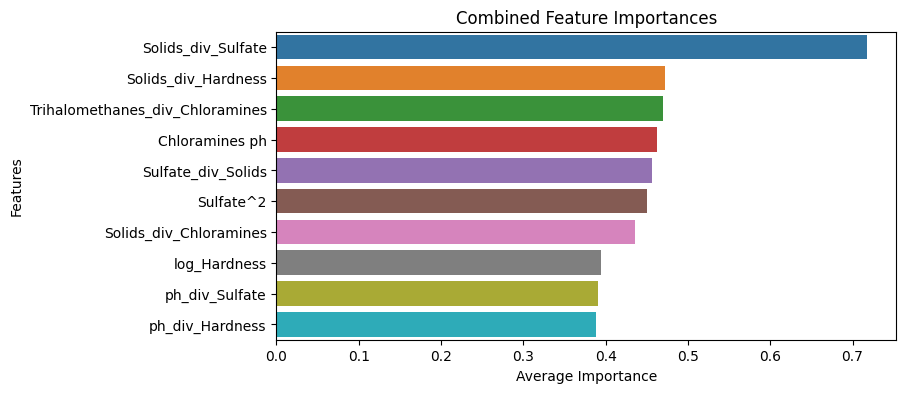

In [59]:
# Fill NaN values with 0 (if any)
combined_importance = combined_importance.fillna(0)

# Calculate the average importance
combined_importance['Average_Importance'] = combined_importance.mean(axis=1)

# Check the combined DataFrame
print("Combined Importance:\n", combined_importance.head())

# Select top features
top_n = 10
selected_features = combined_importance.nlargest(top_n, 'Average_Importance')

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='Average_Importance', y=selected_features.index, data=selected_features)
plt.title('Combined Feature Importances')
plt.xlabel('Average Importance')
plt.ylabel('Features')
plt.show()

In [50]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Normalize importances
scaler = MinMaxScaler()
lasso_importance_df['Normalized'] = scaler.fit_transform(lasso_importance_df[['Importance']])
rf_importance_df['Normalized'] = scaler.fit_transform(rf_importance_df[['Importance']])
mi_importance_df['Normalized'] = scaler.fit_transform(mi_importance_df[['Importance']])
anova_importance['Normalized'] = scaler.fit_transform(anova_importance[['F-Score']])

# Check the DataFrame structure
print("Top features from lasso test: \n", lasso_importance_df.head()) 


# Check the DataFrame structure
print("\n Top features from random forest test: \n", rf_importance_df.head())

# Check the DataFrame structure
print(" \n Top features from mutual information test: \n", mi_importance_df.head())

# Check the DataFrame structure
print("\n Top features from ANOVA test: \n", anova_importance.head())


# Check indices
print("\n Lasso Index:\n", lasso_importance_df.index)
print("\n Random Forest Index:\n", rf_importance_df.index)
print("\n Mutual Information Index:\n", mi_importance_df.index)
print("\n ANOVA Index:\n", anova_importance.index)


Top features from lasso test: 
                             Feature  Importance  Normalized
11               Solids_div_Sulfate    0.022464    1.000000
12               Sulfate_div_Solids    0.018200    0.886841
10                  ph_div_Hardness    0.012663    0.739909
8            Solids_div_Chloramines    0.011913    0.720013
9   Trihalomethanes_div_Chloramines    0.010214    0.674927

 Top features from random forest test: 
                 Feature  Importance  Normalized
269           Sulfate^2    0.008903    1.000000
51   Sulfate_x_Hardness    0.008834    0.992103
254    Hardness Sulfate    0.007755    0.867509
123  Sulfate_x_Hardness    0.007234    0.807473
284         log_Sulfate    0.007139    0.796466
 
 Top features from mutual information test: 
                      Feature  Importance  Normalized
251               Hardness^2    0.021837    1.000000
1                   Hardness    0.021770    0.996965
227                 Hardness    0.021770    0.996965
281             lo